# EDA and Methodology

This section of the website displays our process of cleaning each data set and manipulating it to create our desired outputs and analysis. 

## Imports

In [1]:
# !pip install geopandas
# !pip install mapclassify
import geopandas as gpd
import mapclassify
import shapely
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', 150)

## Listings data

Important cleaning notes:

- Converted bathrooms from string to float
- Converted price from string to float, removed punctuation
- Data from 3/20/2023

Most important vars:

- id
- neighborhood
- property type
- guests accommodated
- bathrooms
- bedrooms
- price
- review score

In [2]:
# load listings data
listings = pd.read_csv('../inputs/listings.csv.gz', compression='gzip')

# fix to bathrooms column
num_pattern = r'(\d+\.*\d*)'
listings['bathrooms'] = listings['bathrooms_text'].str.extract(num_pattern).astype(float)

# fix prices string
listings['price'] = listings['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
listings[['id','neighbourhood','property_type','accommodates','bathrooms','bedrooms',\
          'price','review_scores_rating']].head()

,id,neighbourhood,property_type,accommodates,bathrooms,bedrooms,price,review_scores_rating
0,3781,"Boston, Massachusetts, United States",Entire rental unit,2,1.0,1.0,132.0,4.96
1,5506,"Boston, Massachusetts, United States",Entire guest suite,2,1.0,1.0,149.0,4.79
2,6695,"Boston, Massachusetts, United States",Entire condo,4,1.0,NaN,179.0,4.81
3,8789,"Boston, Massachusetts, United States",Entire rental unit,2,1.0,1.0,90.0,4.64
4,4765070,"Jamaica Plain, Massachusetts, United States",Entire rental unit,2,1.0,NaN,98.0,4.63


In [3]:
# Time of data retrieval

print(f"Data last retrieved on {listings['last_scraped'].max()}.")

Data last retrieved on 2023-03-20.


27.74% of sales are between $200 and $500
4.14% of sales are greater than $500
68.12% of sales are less than $200


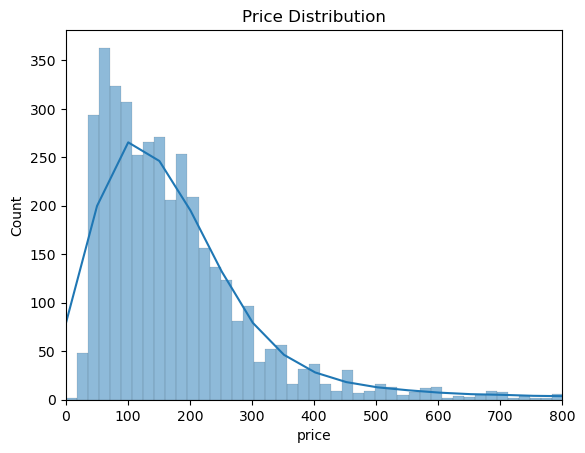

In [4]:
# listings price distribution

sns.histplot(listings['price'], 
             kde = True)\
             .set(title = 'Price Distribution',
                  xlim = [0,800])

filt1 = listings[(listings['price'] >= 200) & (listings['price'] <= 500)]
percentage = (len(filt1) / len(listings)) * 100
print(f"{percentage:.2f}% of sales are between $200 and $500")
filt2 = listings[(listings['price'] > 500)]
percentage2 = (len(filt2) / len(listings)) * 100
print(f"{percentage2:.2f}% of sales are greater than $500")
filt3 = listings[(listings['price'] < 200)]
percentage3 = (len(filt3) / len(listings)) * 100
print(f"{percentage3:.2f}% of sales are less than $200")

In [5]:
# listings by neighborhood

listings['neighbourhood_cleansed'].value_counts()

Dorchester                 511
Downtown                   351
Roxbury                    291
Brighton                   290
Back Bay                   275
South End                  264
East Boston                226
Jamaica Plain              215
Allston                    192
South Boston               170
Beacon Hill                169
Fenway                     163
North End                  107
Chinatown                   99
Charlestown                 75
Roslindale                  67
Hyde Park                   65
Mission Hill                64
Mattapan                    55
Bay Village                 53
South Boston Waterfront     51
West Roxbury                51
West End                    47
Leather District             8
Longwood Medical Area        5
Name: neighbourhood_cleansed, dtype: int64

In [6]:
# room type distribution

listings['room_type'].value_counts()

Entire home/apt    2528
Private room       1299
Hotel room           21
Shared room          16
Name: room_type, dtype: int64

In [7]:
# other stats

stats = pd.DataFrame(listings[['id','neighbourhood','property_type','accommodates','bathrooms','bedrooms',\
          'price','review_scores_rating']])
stats.describe()

,id,accommodates,bathrooms,bedrooms,price,review_scores_rating
count,3.864000e+03,3864.000000,3860.000000,3404.000000,3864.000000,2741.000000
mean,2.426906e+17,3.165890,1.218394,1.745887,190.609990,4.683915
std,3.417762e+17,2.190197,0.606049,1.199617,251.949604,0.468679
min,3.781000e+03,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.531438e+07,2.000000,1.000000,1.000000,85.000000,4.600000
50%,4.816150e+07,2.000000,1.000000,1.000000,148.500000,4.800000
75%,6.419824e+17,4.000000,1.500000,2.000000,225.000000,4.960000
max,8.493358e+17,16.000000,6.000000,13.000000,10000.000000,5.000000


## Calendar data

Important notes:

- Converted date to datetime
- data between 3/19/2023 - 3/18/2024

In [8]:
calendar = pd.read_csv('../inputs/calendar.csv.gz', compression='gzip')
calendar["date"] = pd.to_datetime(calendar["date"])
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2023-03-19,f,$125.00,$125.00,32.0,1125.0
1,3781,2023-03-20,f,$125.00,$125.00,32.0,1125.0
2,3781,2023-03-21,f,$125.00,$125.00,32.0,1125.0
3,3781,2023-03-22,f,$125.00,$125.00,32.0,1125.0
4,3781,2023-03-23,f,$125.00,$125.00,32.0,1125.0


In [9]:
# calendar date range

print(f"{calendar['date'].min()} to {calendar['date'].max()}.")

2023-03-19 00:00:00 to 2024-03-18 00:00:00.


In [10]:
# vacancy statistics

calendar['Availability'] = np.where(calendar['available'] == 't', 'available', 'booked')

sum = calendar['Availability'].value_counts().sum()
vac = calendar['Availability'].value_counts()['available']

vac_rate = (vac / sum).round(2)

print(calendar['Availability'].value_counts())
print(f"vacancy rate: {vac_rate}")

available    777267
booked       632756
Name: Availability, dtype: int64
vacancy rate: 0.55


In [11]:
# rental length distribution

calendar['rental_length'] = np.where(calendar['minimum_nights'] < 28, 'short-term', 'long-term')

rental_length = calendar['rental_length']
print(rental_length.value_counts())

long-term     713090
short-term    696933
Name: rental_length, dtype: int64


## Census data

Important notes:

- Replaced column names with the first row
- Add Harbor Islands
- Convert to int

In [12]:
# load census neighborhood data for boston
NBH_data = pd.read_csv("../inputs/census-neighborhood-data.csv")

# making a dict to replace the column names with the first row
col_dict = {old_col: new_col for old_col, new_col in zip(NBH_data.columns, NBH_data.iloc[0])}

# rename columns with dictionary
NBH_data = NBH_data.rename(columns=col_dict)

# drop the first row, which is now redundant
NBH_data = NBH_data.drop(index=0)

# filter to include what we need (doesn't have harbor islands data)
NBH_data = NBH_data.iloc[:, :7].join(NBH_data.iloc[:, [31, 32]])
add_NBH = ['Harbor Islands', 340, 85, 88, 146, 3, 18, 0, 0]
NBH_data.loc[len(NBH_data) + 1] = add_NBH

# convert to int
NBH_data[NBH_data.columns[1:]] = NBH_data[NBH_data.columns[1:]].astype(int)

In [13]:
sum = NBH_data['Total:'].sum()
white = NBH_data['White alone'].sum()
black = NBH_data['Black or African American alone'].sum()
hispanic = NBH_data['Hispanic or Latino'].sum()
asian_pacific = NBH_data['Asian, Native Hawaiian and Pacific Islander alone, all ages'].sum()
other = NBH_data['Other Races or Multiple Races,  all ages'].sum()

print(f"white:           {round(white/sum,2)*100}%")
print(f"black:           {round(black/sum,2)*100}%")
print(f"hispanic:        {round(hispanic/sum,2)*100}%")
print(f"asian/pacific:   {round(asian_pacific/sum,2)*100}%")
print(f"other:            {round(other/sum,2)*100}%")

white:           45.0%
black:           19.0%
hispanic:        19.0%
asian/pacific:   11.0%
other:            6.0%


# Map data

Important notes:

- convert coordinates to standard longitude/latitude system using epsg 4326
- create var whether listing is in a neighborhood
- plot value counts of listings in each neighborhood
- project onto equal-area to get density per km^2

***Do this for census tracts also

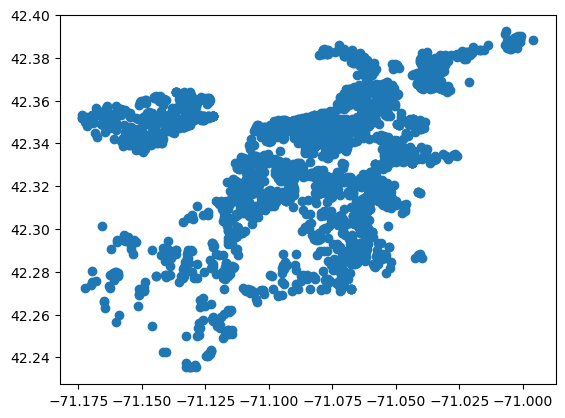

In [14]:
plt.scatter(listings['longitude'], listings['latitude'])

<Axes: >

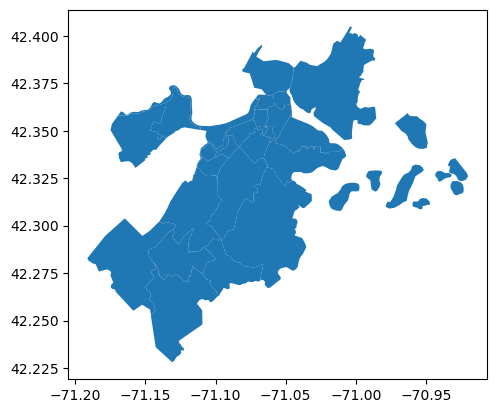

In [15]:
# load neighborhood geometry info
boston_NBH = gpd.read_file("../inputs/Census2020_BG_Neighborhoods/Census2020_BG_Neighborhoods.shp")

# set to the standard longitute/latitude system
boston_NBH = boston_NBH.to_crs('epsg:4326')

# neighborhood map
boston_NBH.plot()

In [16]:
# function to create a new column based on whether or not a listing is in a neighborhood
def assign_census_NBH(bnb):
    bools = [geom.contains(bnb['geometry']) for geom in boston_NBH['geometry']]
    if True in bools:
        return boston_NBH.iloc[bools.index(True)]['BlockGr202']
    else:
        return np.nan

In [17]:
# add geometry to listings data set
listings = gpd.GeoDataFrame(listings, geometry=listings.apply(
        lambda srs: shapely.geometry.Point(srs['longitude'], srs['latitude']), axis='columns'
    ))

# .apply the function to the listings
listings['census_NBH'] = listings.apply(assign_census_NBH, axis='columns')

# use .map() to apply value_counts to each value of 'BlockGr202'
boston_NBH['BNBs'] = boston_NBH['BlockGr202'].map(listings['census_NBH'].value_counts())
boston_NBH['BNBs'] = boston_NBH['BNBs'].fillna(0)
boston_NBH.set_index('BlockGr202', inplace=True)

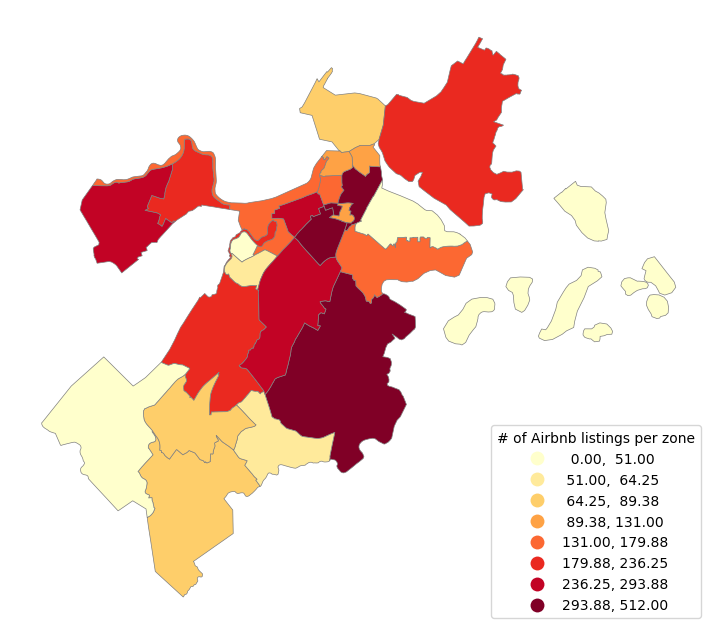

In [18]:
# choropleth map for neighborhoods
# disregards population density
f = plt.figure(figsize=(9,9.15))
ax = f.gca()
kw = dict(column='BNBs', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_NBH.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': '# of Airbnb listings per zone'})
ax.set_axis_off()

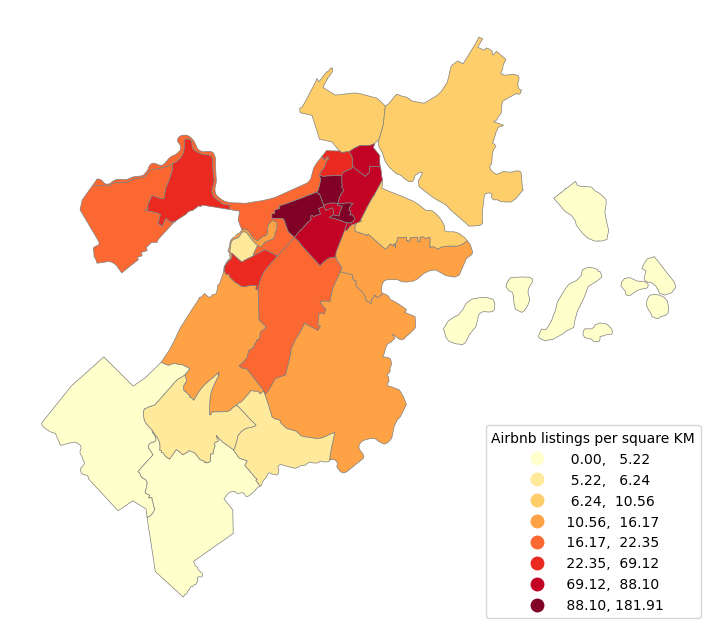

In [19]:
# this code reprojects the areas into an "equal-area" projection
# this is so that we can get listings per Kilometer^2
boston_NBH['BNBDensity'] = (boston_NBH['BNBs'] / boston_NBH['geometry']\
                            .to_crs('epsg:3395')\
                            .map(lambda p: p.area / 10**6))\
                            .fillna(0)

# this graph represents listings per square KM as Neighborhoods
f = plt.figure(figsize=(9, 9))
ax = f.gca()
kw = dict(column='BNBDensity', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_NBH.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': "Airbnb listings per square KM"})
ax.set_axis_off()

## Correlation data

Vars most correlated with listing price:

1. Accommodates
2. Bedrooms
3. Bathrooms

We would expect these variables to be highly correlated with listing price, and we will use these vars along with others to generate suggested listing prices based on a potential property's features.

In [20]:
df = listings.select_dtypes(include = 'number')
df.corr().iloc[12].drop(columns=["id"])

id                                              0.014822
scrape_id                                            NaN
host_id                                         0.027121
host_listings_count                             0.011211
host_total_listings_count                      -0.011811
neighbourhood_group_cleansed                         NaN
latitude                                        0.081329
longitude                                       0.090658
accommodates                                    0.382871
bathrooms                                       0.314205
bedrooms                                        0.213189
beds                                            0.355472
price                                           1.000000
minimum_nights                                 -0.135298
maximum_nights                                  0.018940
minimum_minimum_nights                         -0.083016
maximum_minimum_nights                         -0.028242
minimum_maximum_nights         